<a href="https://colab.research.google.com/github/Nikhil2Nagpal/google-search-data/blob/main/Google_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

In [5]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = 'Cloud Computing'

In [6]:
pytrends.build_payload([keyword], cat = 0, timeframe='today 12-m', geo='', gprop='')

In [7]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

/tmp/ipython-input-485613567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = region_data[keyword], y = region_data.index, palette = 'Blues_d')


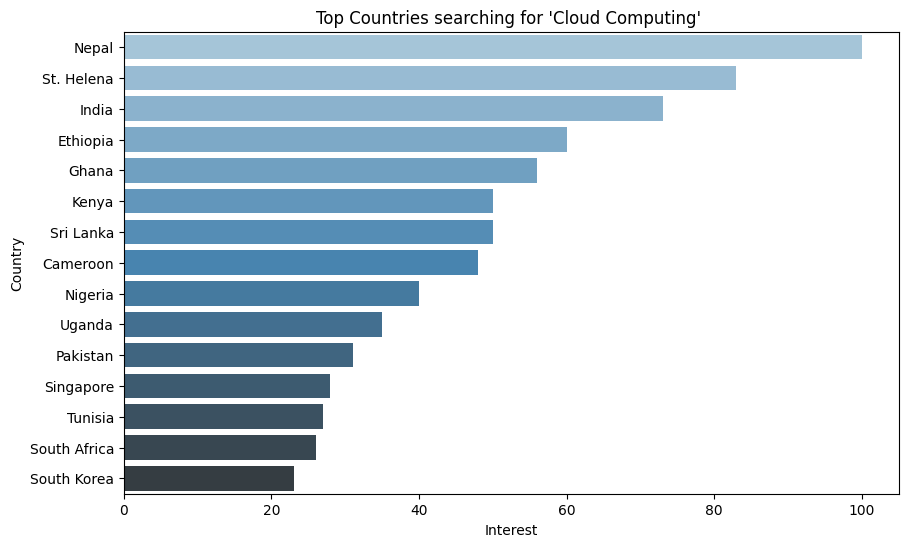

In [8]:
plt.figure(figsize = (10, 6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = 'Blues_d')
plt.title(f"Top Countries searching for '{keyword}' ")
plt.xlabel('Interest')
plt.ylabel('Country')
plt.show()

#World Map

In [9]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                   locations = 'geoName',
                   locationmode = 'country names',
                   color = keyword,
                   title=f"Search Interest for '{keyword}' by country",
                   color_continuous_scale='Blues')
fig.show()

# time wise interest

In [10]:
time_df = pytrends.interest_over_time()

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



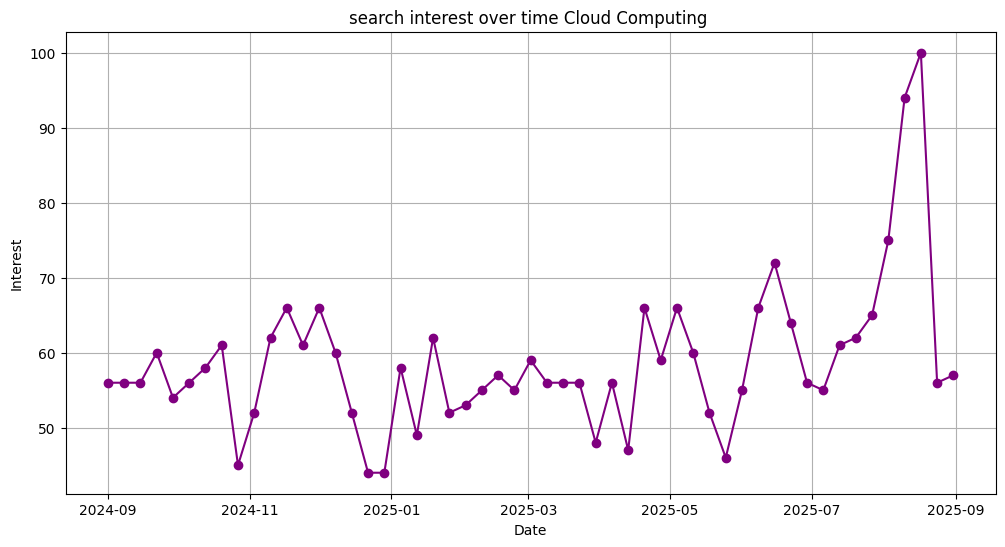

In [11]:
plt.figure(figsize = (12, 6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"search interest over time {keyword} ")
plt.xlabel('Date')
plt.ylabel('Interest')
plt.grid(True)
plt.show()

# multiple keywords compare

In [12]:
kw_list = ['Cloud Computing', 'Artifical Inteligence', 'Data Science', 'Python', 'Machine Learning']
pytrends.build_payload(kw_list, cat = 0, timeframe='today 12-m', geo='', gprop='')

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



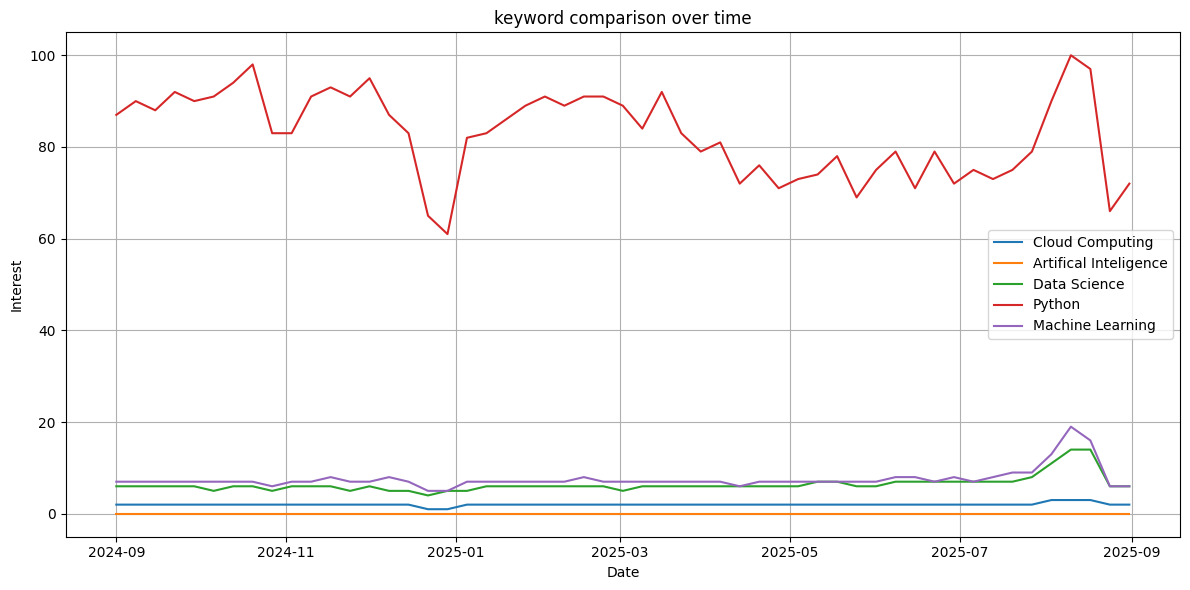

In [13]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize = (12, 6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title('keyword comparison over time')
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()